<a href="https://colab.research.google.com/github/Mendigo-Mistico/Projeto_Notas_Escolares_IA_GEMINI/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalação inicial das bibliotecas e configurações de API_KEY**

In [178]:
!pip install -q -U google-generativeai
# Importar a Python SDK
import google.generativeai as genai

# Uso Seguro da API_KEY
from google.colab import userdata
api_key = userdata.get('Secret_Key')
genai.configure(api_key=api_key)

#Calulos Matematicos e Manipulação de DataFrames
import numpy as np
import pandas as pd

# Entrada de Dados
from google.colab import files
from pathlib import Path
import os
import io


Definindo parametros da para a IA

In [ ]:

generation_config = {
    "candidate_count": 1,
    "temperature": 1,
}

safety_settings = {
    "Harassment": "BLOCK_NONE",
    "Hate": "BLOCK_NONE",
    "Sexual": "BLOCK_NONE",
    "Dangerous": "BLOCK_NONE",
}

Selecionando a versão utilizada no modelo e setando os parâmentros

In [ ]:
model = genai.GenerativeModel (model_name='gemini-1.5-pro-latest',
                               generation_config=generation_config,
                               safety_settings=safety_settings)

Base de Entrada da Planilha

*   Serie sendo de 1º Fundamental a 3º Medio
*   Salas sendo de A, B ou C
*   Materia podenendo ser Colocadas de acordo com a necessidade do professor

*   **Lembrete: As medias do alunos de ensino fundamental, serão diferentes por terem menos materias que no ensimo médio**





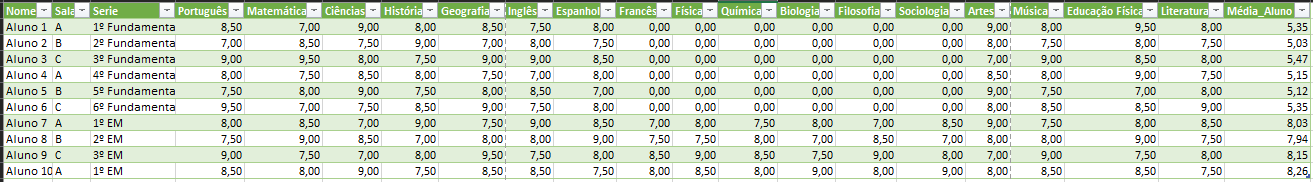

**Todas as informações fora geradas pelo Gemini e são fictícias**.

Subindo o Arquivo **CSV** das notas dos alunos e Transformando em DataFrame

In [ ]:
#Exluir Arquivos Anteriores
arquivos_para_manter = ['.config', 'sample_data']

for filename in os.listdir('/content'):
  if filename not in arquivos_para_manter:
    caminho_completo = os.path.join('/content', filename)
    if os.path.isfile(caminho_completo):
      os.remove(caminho_completo)
      print(f"Arquivo '{filename}' excluído.")
    else:
      print(f"'{filename}' não é um arquivo.")

# Carrega o arquivo das Notas
uploaded = files.upload()

df_notas = pd.read_csv(list(uploaded.keys())[0])

# Preenche as áreas vazias com 0
df_notas = df_notas.fillna(0)
df_notas


Arquivo 'Notas.csv' excluído.


Saving Notas.csv to Notas.csv


,Nome,Sala,Serie,Português,Matemática,Ciências,História,Geografia,Inglês,Espanhol,Francês,Física,Química,Biologia,Filosofia,Sociologia,Artes,Música,Educação Física,Literatura
0,Aluno 1,A,1º Fundamental,8.5,7.0,9.0,8.0,8.5,7.5,8.0,,,,,,,9.0,8.0,9.5,8.0
1,Aluno 2,B,2º Fundamental,7.0,8.5,7.5,9.0,7.0,8.0,7.5,,,,,,,8.0,7.5,8.0,7.5
2,Aluno 3,C,3º Fundamental,9.0,9.5,8.0,7.5,9.0,9.0,8.5,,,,,,,7.0,9.0,8.5,8.0
3,Aluno 4,A,4º Fundamental,8.0,7.5,8.5,8.0,7.5,7.0,8.0,,,,,,,8.5,8.0,9.0,7.5
4,Aluno 5,B,5º Fundamental,7.5,8.0,9.0,7.5,8.0,8.5,7.0,,,,,,,9.0,7.5,7.0,8.0
5,Aluno 6,C,6º Fundamental,9.5,7.0,7.5,8.5,9.0,7.5,8.0,,,,,,,8.0,8.5,8.5,9.0
6,Aluno 7,A,1º EM,8.0,8.5,7.0,9.0,7.5,9.0,8.5,7.0,8.0,7.5,8.0,7.0,8.5,9.0,7.5,8.0,8.5
7,Aluno 8,B,2º EM,7.5,9.0,8.5,7.0,8.0,8.0,9.0,7.5,7.5,8.0,7.0,8.5,7.0,8.0,8.0,9.0,7.5
8,Aluno 9,C,3º EM,9.0,7.5,7.0,8.0,9.5,7.5,8.0,8.5,9.0,8.5,7.5,9.0,8.0,7.0,9.0,7.5,8.0
9,Aluno 10,A,1º EM,8.5,8.0,9.0,7.5,8.5,8.5,7.5,8.0,8.5,8.0,9.0,8.0,9.0,8.0,8.5,8.5,7.5


Converti as Colunas em Numericas para não dar erro no momento de calcular as médias. Deixando somente as três de cabeçalho como texto

In [ ]:
# Seleciona as colunas que não devem ser numéricas
colunas_numericas = df_notas.columns[3:]

# Converte as colunas selecionadas para numéricas
df_notas[colunas_numericas] = df_notas[colunas_numericas].apply(pd.to_numeric, errors='coerce')
df_notas.dtypes

Nome                object
Sala                object
Serie               object
Português          float64
Matemática         float64
Ciências           float64
História           float64
Geografia          float64
Inglês             float64
Espanhol           float64
Francês            float64
Física             float64
Química            float64
Biologia           float64
Filosofia          float64
Sociologia         float64
Artes              float64
Música             float64
Educação Física    float64
Literatura         float64
dtype: object

**Analise do Data Frame**


*   Encontrar os 3 Aluno com a menor nota geral.
*   Encontrar qual a materia e sala que teve a menor nota.



In [ ]:
# Substitui valores vazios por 0
df_notas = df_notas.fillna(0)
menor_nota = np.nanmin(df_notas.iloc[:, 3:].values)

# Cria uma coluna "Nota Geral" com a média das notas
df_notas['Nota Geral'] = df_notas.iloc[:, 3:].mean(axis=1)

# Ordena o DataFrame pela "Nota Geral" e pega os 3 alunos com as menores notas
alunos_menor_nota = df_notas.sort_values(by='Nota Geral').head(3)

# Exibe os alunos com a menor nota geral em ordem alfabetica por nome
print("3 Alunos com Menor Nota Geral:")
alunos_menor_nota = alunos_menor_nota.sort_values(by='Nome')
print(alunos_menor_nota[['Nome', 'Nota Geral']].round(2))

# Encontra a menor nota no DataFrame
menor_nota = df_notas.iloc[:, 3:].min().min()

# Encontra a matéria e sala com a menor nota
materia_menor_nota = df_notas.iloc[:, 3:].min().idxmin()
sala_menor_nota = df_notas[df_notas[materia_menor_nota] == menor_nota]['Sala'].iloc[0]

# Encontra a matéria e sala com a menor nota
materia_menor_nota = df_notas.iloc[:, 3:].min().idxmin()
sala_menor_nota = df_notas[df_notas[materia_menor_nota] == menor_nota]['Sala'].iloc[0]
serie_menor_nota = df_notas[df_notas[materia_menor_nota] == menor_nota]['Serie'].iloc[0]

print("\nMatéria com Menor Nota:", materia_menor_nota)
print("Sala com Menor Nota:", sala_menor_nota)
print("Serie com Menor Nota:", serie_menor_nota)

3 Alunos com Menor Nota Geral:
      Nome  Nota Geral
1  Aluno 2        5.03
3  Aluno 4        5.15
4  Aluno 5        5.12

Matéria com Menor Nota: Francês
Sala com Menor Nota: A
Serie com Menor Nota: 1º Fundamental


In [ ]:

# Substitui valores vazios por 0
df_notas = df_notas.fillna(0)

# Calcula a média por matéria
medias_materias = df_notas.iloc[:, 3:].mean()
menor = medias_materias[-2]
nome_materia = medias_materias.index[-2]

# Cria uma coluna "Nota Geral" com a média das notas
df_notas['Nota Geral'] = df_notas.iloc[:, 3:].mean(axis=1)

# Ordena o DataFrame pela "Nota Geral" e pega os 3 alunos com as menores notas
alunos_menor_nota = df_notas.sort_values(by='Nota Geral').head(3)

# Exibe os alunos com a menor nota geral
print("\n3 Alunos com Menor Nota Geral:")
print(alunos_menor_nota[['Nome', 'Nota Geral']].round(2))

# Encontra a menor nota no DataFrame
menor_nota = df_notas.iloc[:, 3:].min().min()


print(f"A matéria '{nome_materia}' tem a penúltima menor média, com valor {menor:.2f}.(Ultimo é a Média Geral)")



#-------------------------------------------------

# Criando uma lista para armazenar as médias das séries
medias_por_serie = []

# Iterando sobre as séries únicas no DataFrame
for serie in df_notas['Serie'].unique():
    # Filtrando o DataFrame para obter apenas os alunos da série atual
    alunos_serie = df_notas[df_notas['Serie'] == serie]
    # Calculando a média das notas de todas as matérias para a série atual
    media_serie = alunos_serie.iloc[:, 3:].mean().mean()
    # Adicionando a média da série à lista
    medias_por_serie.append(media_serie)

# Encontrando a menor média
menor_media = min(medias_por_serie)

# Encontrando os índices das séries com a menor média
indices_series_menor_media = [i for i, media in enumerate(medias_por_serie) if media == menor_media]

# Encontrando os nomes das séries com a menor média
series_menor_media = df_notas['Serie'].unique()[indices_series_menor_media].tolist()



print("Séries com a Menor Média:", series_menor_media)


3 Alunos com Menor Nota Geral:
      Nome  Nota Geral
1  Aluno 2        5.03
4  Aluno 5        5.12
3  Aluno 4        5.15
A matéria 'Literatura' tem a penúltima menor média, com valor 7.95.(Ultimo é a Média Geral)
Séries com a Menor Média: ['2º Fundamental']


Define qual será a entrada do Prompt do Gemini



In [169]:
prompt = f"""
A menor nota encontrada foi {menor:.2f} na matéria {nome_materia} do ({serie_menor_nota}).

Crie um relatório completo sobre o desempenho dos alunos, destacando os alunos com dificuldades e as áreas que precisam de mais atenção. Inclua também sugestões de como melhorar o desempenho geral da turma.
"""

print(prompt)


A menor nota encontrada foi 7.95 na matéria Literatura do (1º Fundamental).

Crie um relatório completo sobre o desempenho dos alunos, destacando os alunos com dificuldades e as áreas que precisam de mais atenção. Inclua também sugestões de como melhorar o desempenho geral da turma.



In [180]:
response = model.generate_content(prompt)
print(response.text)

## Relatório de Desempenho em Literatura - 1º Ano do Ensino Fundamental

**Introdução:**

Este relatório analisa o desempenho da turma do 1º Ano do Ensino Fundamental na disciplina de Literatura, com foco na menor nota registrada: 7,95. O objetivo é identificar alunos com dificuldades, áreas que requerem atenção e sugerir estratégias para melhorar o desempenho geral da turma.

**Análise da Menor Nota:**

A nota 7,95, sendo a mais baixa, indica que pelo menos um aluno necessita de atenção individualizada. É crucial entender o contexto dessa nota:

* **Representatividade:** Essa nota é um caso isolado ou reflete um padrão na turma? Quantos alunos tiveram notas próximas a essa?
* **Critérios de avaliação:** O que a avaliação cobrou? A nota reflete dificuldades em leitura, interpretação, criatividade ou outros aspectos?
* **Fatores externos:**  Existem fatores externos que podem ter impactado o desempenho do aluno, como questões socioemocionais, dificuldades de aprendizagem ou falta de apo